<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/Case_Assignment_I/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name: Matthew Zychowicz**

**Student Number: 400145284**

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file and upload it to Colab.

* Load the dataset as a pandas data frame and display the first few rows.

    * How many features (columns) and records (rows) are in the dataset?

In [10]:
import pandas as pd

df = pd.read_csv('NataData.csv')

print(df.head())

print(df.shape)



     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-04-09       58       635  ...                  7             0   
1  2014-08-03       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  2014-10-02       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

The NataData.csv has **29** features with **2240** records

## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [11]:
# Check for missing values across all columns
missing_values = df.isnull().sum()

# Print columns with missing values and their counts
print(missing_values[missing_values > 0])

# What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.
# Drop missing values
df = df.dropna()

print(df.shape)


Income    24
dtype: int64
(2216, 29)


The columns that contains the missing data is the **"Income"** column with **24** missing entries. I had decided to drop the entries that have the missing income data. This is because I do not want to have this data skew the results by incputing fake. Another reason is not produce fake data for the missing values is because the entries that have null values is relatively small compared to the larger dataset. Dropping these entries will not create a huge issue. This has decreased the entries from 2240 to 2216.

## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [12]:
# Identify columns with constant values and print the columns
constant_columns = df.columns[df.nunique() == 1]
print(constant_columns)

# Drop constant columns
df = df.drop(columns=constant_columns)

# Confirm how many columns remain
print(df.shape)

Index(['Z_CostContact', 'Z_Revenue'], dtype='object')
(2216, 27)


The columns that have no variance is the Z_CostContact and Z_Revenue columns. The amount of columns decreased from 29 to 27 columns.

## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [19]:
# Add a new column Customer_Days to store the total number of days each customer has been with the company.

from datetime import datetime

# Convert Dt_Customer to datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='mixed', dayfirst=True)

# Setting current data
today = datetime.today()

# Finiding different between today and the onboarding date
df['Customer_Days'] = (today - df["Dt_Customer"]).dt.days

# Display the first few rows of the updated DataFrame
print(df.head())



     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2012-04-09       58       635  ...                  4                  7   
1  2014-08-03       38        11  ...                  2                  5   
2  2013-08-21       26       426  ...                 10                  4   
3  2014-10-02       26        11  ...                  4                  6   
4  2014-01-19       94       173  ...                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp

## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

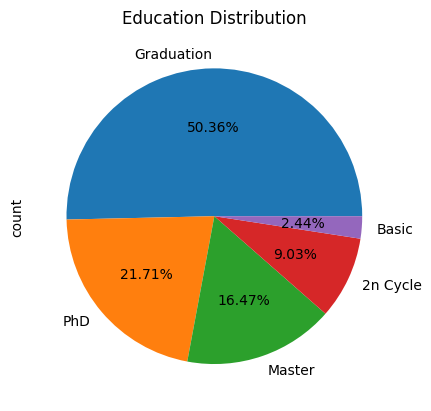

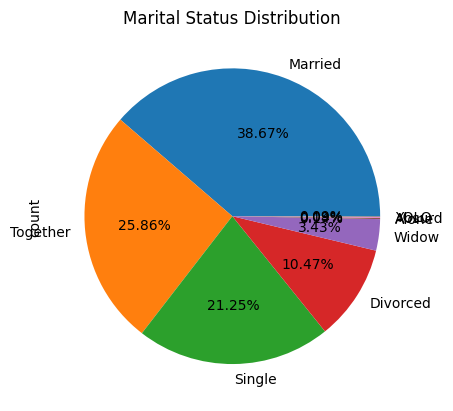

In [28]:
# For Education and Marital_Status

import matplotlib.pyplot as plt

# Find how many customers fall into each category
education_counts = df['Education'].value_counts()
marital_status_counts = df['Marital_Status'].value_counts()

# Create pie charts
education_counts.plot(kind='pie', autopct='%1.2f%%')
plt.title('Education Distribution')
plt.show()

marital_status_counts.plot(kind='pie', autopct='%1.2f%%')
plt.title('Marital Status Distribution')
plt.show()




The Education and Martial Status Distribution is suggesting the company's largest demographic are of education level "Graduation" and marital status "Married". Which is 50.36 % and 38.67 % respectively.

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

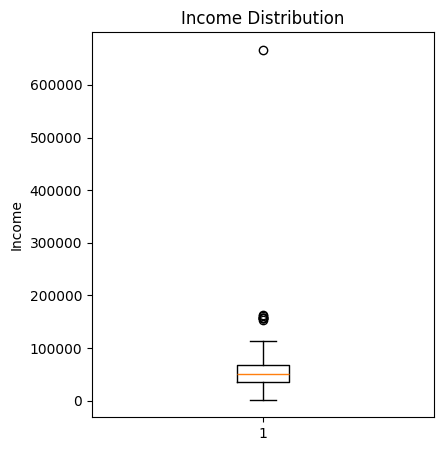

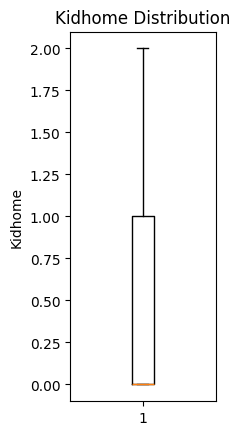

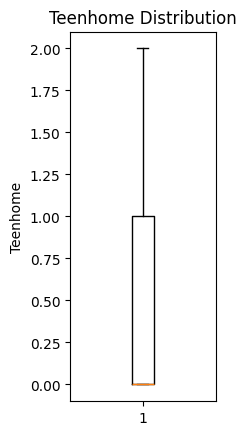

In [30]:
# For Income, Kidhome, and Teenhome use boxplots to visualize their distributions.

import matplotlib.pyplot as plt

# Create boxplots for Income, Kidhome, and Teenhome

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Income'])
plt.title('Income Distribution')
plt.ylabel('Income')

plt.show()

plt.subplot(1, 3, 2)
plt.boxplot(df['Kidhome'])
plt.title('Kidhome Distribution')
plt.ylabel('Kidhome')

plt.show()

plt.subplot(1, 3, 3)
plt.boxplot(df['Teenhome'])
plt.title('Teenhome Distribution')
plt.ylabel('Teenhome')

plt.show()

Based on the three boxplots of Income, children at home and teenagers at home. The typical household profile of Nata's customers are making around $60,000 which 0 children and teenagers at home. This was determined by looking at the mean values of each boxplot.

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [32]:
# Calculate total spending for each product
total_spending = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Find the product with highest spending
max_spending_product = total_spending.idxmax()
max_spending_amount = total_spending[max_spending_product]

# Display results
print("Total spending by product:")
print(total_spending.sort_values(ascending=False))
print(f"\nThe product with the highest total spending amount is {max_spending_product} with a total spending amount of ${max_spending_amount:,.2f}.")

Total spending by product:
MntWines            676083
MntMeatProducts     370063
MntGoldProds         97427
MntFishProducts      83405
MntSweetProducts     59896
MntFruits            58405
dtype: int64

The product with the highest total spending amount is MntWines with a total spending amount of $676,083.00.


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

I used Gen AI for completions after commenting what I wanted it to do. My IDE of choice is cursor and I used its built in AI functionality, I have a pro subscription. 